<a href="https://colab.research.google.com/github/DeaWahsa/skripsikuu/blob/main/Copy_of_Bismillah_Preprocessing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA COLLECTION**

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from google.colab import drive
from sklearn.feature_selection import SelectKBest

# Mount Google Drive
drive.mount('/content/drive')

# Baca file GAPED.csv dari Google Drive
path = '/content/drive/My Drive/Colab Notebooks/GAPED.csv'
df_GAPED = pd.read_csv(path)

# Menampilkan isi dataframe
df_GAPED


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Plant,PR Number,Item No of PR,Acct Assign. Cat,Requirement Track. No,Short Text,WBS Element,WBS Desc,PR Date,GL Account,Cost Center,Profit Center,PR Quantity,PR Unit,Doc. Total Amount PR,Doc. Currency,PO Number,Item No of PO,Vendor,Name of Vendor,PO Date,Delivery Date,PO Quantity,PO Unit,Doc. Total Amount PO,No GR,Item GR Doc,Posting Date GR,Doc Date GR,Quan. GR,Doc. Currency.1,Doc. Amount,Local Currency,Local Amount,No IR,Item IR Doc,Posting Date IR,Doc Date IR,Quan. IR,Doc. Currency.2,Doc. Amount.1,Local Currency.1,Local Amount.1,Identification Project,Description Project,Contract Number,Contract Date
0,DR7E,10388159.0,10.0,R,2100914220,R7 MKS ANT PT2 NOV 2021(8 LOP),T-21-7111-16-01-I,PT2 TREG VII,11/29/2021,13190502.0,T667A01,T667A01,1.0,PAK,8.475.965,IDR,4.500447e+09,10.0,99000056.0,PT. TELKOM AKSES,12/27/2021,2/24/2022,1.0,PAK,3.582.546,5.000835e+09,1.0,3/14/2022,3/11/2022,1.0,IDR,"3,582,546",IDR,"3,582,546",5.106179e+09,1.0,3/25/2022,3/25/2022,1.0,IDR,"3,582,546",IDR,"3,582,546",T-2021-DR7E-044,PT-2 8 LOP Periode November Area Witel Makassa...,K.TEL.010792/HK.810/R7W-7A100000/2021,12/27/2021
1,DR7E,10388159.0,20.0,R,2100914222,R7 MKS BAL PT2 NOV 2021(8 LOP),T-21-7111-16-01-I,PT2 TREG VII,11/29/2021,13190502.0,T667A01,T667A01,1.0,PAK,61.225.634,IDR,4.500447e+09,20.0,99000056.0,PT. TELKOM AKSES,12/27/2021,2/24/2022,1.0,PAK,16.057.014,5.000835e+09,2.0,3/14/2022,3/11/2022,1.0,IDR,"16,057,014",IDR,"16,057,014",5.106179e+09,2.0,3/25/2022,3/25/2022,1.0,IDR,"16,057,014",IDR,"16,057,014",T-2021-DR7E-044,PT-2 8 LOP Periode November Area Witel Makassa...,K.TEL.010792/HK.810/R7W-7A100000/2021,12/27/2021
2,DR7E,10388159.0,30.0,R,2100914224,R7 MKS MAT PT2 NOV 2021(8 LOP),T-21-7111-16-01-I,PT2 TREG VII,11/29/2021,13190502.0,T667A01,T667A01,1.0,PAK,2.358.590,IDR,4.500447e+09,30.0,99000056.0,PT. TELKOM AKSES,12/27/2021,2/24/2022,1.0,PAK,1.955.579,5.000835e+09,3.0,3/14/2022,3/11/2022,1.0,IDR,"1,955,579",IDR,"1,955,579",5.106179e+09,3.0,3/25/2022,3/25/2022,1.0,IDR,"1,955,579",IDR,"1,955,579",T-2021-DR7E-044,PT-2 8 LOP Periode November Area Witel Makassa...,K.TEL.010792/HK.810/R7W-7A100000/2021,12/27/2021
3,DR7E,10388159.0,40.0,R,2100914226,R7 MKS PNK PT2 NOV 2021(8 LOP),T-21-7111-16-01-I,PT2 TREG VII,11/29/2021,13190502.0,T667A01,T667A01,1.0,PAK,60.629.933,IDR,4.500447e+09,40.0,99000056.0,PT. TELKOM AKSES,12/27/2021,2/24/2022,1.0,PAK,24.203.409,5.000835e+09,4.0,3/14/2022,3/11/2022,1.0,IDR,"24,203,409",IDR,"24,203,409",5.106179e+09,4.0,3/25/2022,3/25/2022,1.0,IDR,"24,203,409",IDR,"24,203,409",T-2021-DR7E-044,PT-2 8 LOP Periode November Area Witel Makassa...,K.TEL.010792/HK.810/R7W-7A100000/2021,12/27/2021
4,DR7E,10388159.0,60.0,R,2100914230,R7 MKS TKA PT2 NOV 2021(8 LOP),T-21-7111-16-01-I,PT2 TREG VII,11/29/2021,13190502.0,T667A01,T667A01,1.0,PAK,7.735.037,IDR,4.500447e+09,90.0,99000056.0,PT. TELKOM AKSES,12/27/2021,2/24/2022,1.0,PAK,7.735.037,5.000835e+09,6.0,3/14/2022,3/11/2022,1.0,IDR,"7,735,037",IDR,"7,735,037",5.106179e+09,6.0,3/25/2022,3/25/2022,1.0,IDR,"7,735,037",IDR,"7,735,037",T-2021-DR7E-044,PT-2 8 LOP Periode November Area Witel Makassa...,K.TEL.010792/HK.810/R7W-7A100000/2021,12/27/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7325,TDR7,10406495.0,40.0,R,2201257153,R7 PRE PRE PT2 ODP-TTE-FAB/021,T-22-7121-30-01-I,LME & INST AP CONS TREG-7,12/26/2022,13190502.0,T667A01,T667A01,1.0,PAK,2.165.478,IDR,4.500487e+09,40.0,6610387.0,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,1.0,PAK,2.165.478,5.000874e+09,3.0,12/30/2022,12/30/2022,1.0,IDR,"2,165,478",IDR,"2,165,478",NaN,0.0,NaN,NaN,0.0,NaN,0.00,NaN,0.00,T-22-TDR7-0289,Pengadaan Pekerjaan LastMile FO 16 LoP Area Wi...,K.TEL.012169/HK.810/DR7-10400000/2022,12/28/2022
7326,TDR7,10406495.0,50.0,R,2201257154,R7 PRE ENR PT2 ODP-ENR-FAE/008,T-22-7121-30-01-I,LME & INST AP CONS TREG-7,12/26/2022,13190502.0,T667A01,T667A01,1.0,PAK,2.1

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Baca file SMILE.csv dari Google Drive
path = '/content/drive/My Drive/Colab Notebooks/SMILE.csv'
df_SMILE = pd.read_csv(path)

# Menampilkan isi dataframe
df_SMILE[:5]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Nama Mitra,Nama proyek,Jumlah Projek,Nilai Performansi KHS
0,PT. TELKOM AKSES,PT-2 8 LOP Periode November Area Witel Makassa...,8.0,kontrak harga satuan Kurang memenuhi
1,PT. TELKOM AKSES,PT-2 8 LOP Periode November Area Witel Makassa...,8.0,kontrak harga satuan Kurang memenuhi
2,PT. TELKOM AKSES,PT-2 8 LOP Periode November Area Witel Makassa...,8.0,kontrak harga satuan Kurang memenuhi
3,PT. TELKOM AKSES,PT-2 8 LOP Periode November Area Witel Makassa...,8.0,kontrak harga satuan Kurang memenuhi
4,PT. TELKOM AKSES,PT-2 8 LOP Periode November Area Witel Makassa...,8.0,kontrak harga satuan Kurang memenuhi


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Baca file Witel.csv dari Google Drive
path = '/content/drive/My Drive/Colab Notebooks/Witel.csv'
df_Witel = pd.read_csv(path)

# Menampilkan isi dataframe
df_Witel[:5]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name of Vendor,Contract Number,Tanggal SP,Description Project,Alker/Salker,Stok Material,Jumlah Team,Kerapihan
0,PT. TELKOM AKSES,K.TEL.010792/HK.810/R7W-7A100000/2021,29/11/2021,PT-2 8 LOP Periode November Area Witel Makassa...,alker lengkap,stok material tersedia,team lengkap,rapih
1,PT. TELKOM AKSES,K.TEL.010792/HK.810/R7W-7A100000/2021,29/11/2021,PT-2 8 LOP Periode November Area Witel Makassa...,alker lengkap,stok material tersedia,team lengkap,rapih
2,PT. TELKOM AKSES,K.TEL.010792/HK.810/R7W-7A100000/2021,29/11/2021,PT-2 8 LOP Periode November Area Witel Makassa...,alker lengkap,stok material tersedia,team lengkap,rapih
3,PT. TELKOM AKSES,K.TEL.010792/HK.810/R7W-7A100000/2021,29/11/2021,PT-2 8 LOP Periode November Area Witel Makassa...,alker lengkap,stok material tersedia,team lengkap,rapih
4,PT. TELKOM AKSES,K.TEL.010792/HK.810/R7W-7A100000/2021,29/11/2021,PT-2 8 LOP Periode November Area Witel Makassa...,alker lengkap,stok material tersedia,team lengkap,rapih


# **FEATURE SELECTION**

In [ ]:
features_data_GAPED = df_GAPED[["WBS Desc", "Name of Vendor", "PO Date", "Delivery Date","Doc Date GR", "Local Amount"]].copy()

# Menampilkan data dalam bentuk tabel
features_data_GAPED

,WBS Desc,Name of Vendor,PO Date,Delivery Date,Doc Date GR,Local Amount
0,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"3,582,546"
1,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"16,057,014"
2,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"1,955,579"
3,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"24,203,409"
4,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"7,735,037"
...,...,...,...,...,...,...
7325,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"2,165,478"
7326,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"2,165,478"
7327,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"17,286,773"
7328,NaN,NaN,NaN,NaN,NaN,"865,845,484,973"


In [ ]:
features_data_SMILE = df_SMILE[["Jumlah Projek", "Nilai Performansi KHS"]].copy()

# Menampilkan data dalam bentuk tabel
features_data_SMILE

,Jumlah Projek,Nilai Performansi KHS
0,8.0,kontrak harga satuan Kurang memenuhi
1,8.0,kontrak harga satuan Kurang memenuhi
2,8.0,kontrak harga satuan Kurang memenuhi
3,8.0,kontrak harga satuan Kurang memenuhi
4,8.0,kontrak harga satuan Kurang memenuhi
...,...,...
7322,16.0,kontrak harga satuan memenuhi
7323,16.0,kontrak harga satuan memenuhi
7324,16.0,kontrak harga satuan memenuhi
7325,16.0,kontrak harga satuan memenuhi


In [ ]:
features_data_Witel = df_Witel[["Alker/Salker","Stok Material","Jumlah Team","Kerapihan"]].copy()

# Menampilkan data dalam bentuk tabel
features_data_Witel

,Alker/Salker,Stok Material,Jumlah Team,Kerapihan
0,alker lengkap,stok material tersedia,team lengkap,rapih
1,alker lengkap,stok material tersedia,team lengkap,rapih
2,alker lengkap,stok material tersedia,team lengkap,rapih
3,alker lengkap,stok material tersedia,team lengkap,rapih
4,alker lengkap,stok material tersedia,team lengkap,rapih
...,...,...,...,...
7323,alker lengkap,stok material tersedia,team lengkap,tidak rapih
7324,alker lengkap,stok material tersedia,team lengkap,tidak rapih
7325,alker lengkap,stok material tersedia,team lengkap,tidak rapih
7326,alker lengkap,stok material tersedia,team lengkap,tidak rapih


In [ ]:
kumpulan_data =pd.concat([features_data_GAPED, features_data_SMILE, features_data_Witel], axis='columns')

In [ ]:
kumpulan_data

,WBS Desc,Name of Vendor,PO Date,Delivery Date,Doc Date GR,Local Amount,Jumlah Projek,Nilai Performansi KHS,Alker/Salker,Stok Material,Jumlah Team,Kerapihan
0,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"3,582,546",8.0,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih
1,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"16,057,014",8.0,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih
2,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"1,955,579",8.0,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih
3,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"24,203,409",8.0,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih
4,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"7,735,037",8.0,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih
...,...,...,...,...,...,...,...,...,...,...,...,...
7325,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"2,165,478",16.0,kontrak harga satuan memenuhi,alker lengkap,stok material tersedia,team lengkap,tidak rapih
7326,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"2,165,478",16.0,kontrak harga satuan memenuhi,alker lengkap,stok material tersedia,team lengkap,tidak rapih
7327,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"17,286,773",NaN,NaN,alker lengkap,stok material tersedia,team lengkap,tidak rapih
7328,NaN,NaN,NaN,NaN,NaN,"865,845,484,973",NaN,NaN,NaN,NaN,NaN,NaN


# **DATA CLEANING**

In [ ]:
# Print contoh data kosong dalam bentuk tabel
kumpulan_data = kumpulan_data.dropna()
kumpulan_data

,WBS Desc,Name of Vendor,PO Date,Delivery Date,Doc Date GR,Local Amount,Jumlah Projek,Nilai Performansi KHS,Alker/Salker,Stok Material,Jumlah Team,Kerapihan
0,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"3,582,546",8.0,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih
1,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"16,057,014",8.0,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih
2,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"1,955,579",8.0,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih
3,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"24,203,409",8.0,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih
4,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"7,735,037",8.0,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih
...,...,...,...,...,...,...,...,...,...,...,...,...
7322,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"2,165,478",16.0,kontrak harga satuan memenuhi,alker lengkap,stok material tersedia,team lengkap,tidak rapih
7323,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"2,103,255",16.0,kontrak harga satuan memenuhi,alker lengkap,stok material tersedia,team lengkap,tidak rapih
7324,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"2,165,478",16.0,kontrak harga satuan memenuhi,alker lengkap,stok material tersedia,team lengkap,tidak rapih
7325,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"2,165,478",16.0,kontrak harga satuan memenuhi,alker lengkap,stok material tersedia,team lengkap,tidak rapih


In [ ]:
import numpy as np

# Membersihkan kolom yang hanya berisi nilai null (NaN)
features_data_cleaned_GAPED = features_data_GAPED.dropna(axis=1, how='all')

#Mengganti nilai 0,00 dengan NaN pada kolom "Lo"
features_data_cleaned_GAPED['Local Amount'] = features_data_GAPED['Local Amount'].replace('0.00', np.nan)

# Menghapus baris yang mengandung NaN pada kolom "Nilai Projek"
features_data_cleaned_GAPED = features_data_cleaned_GAPED.dropna(subset=['Local Amount'])

# Menghapus baris yang mengandung nilai NaN pada kolom "WBS Desc"
features_data_cleaned_GAPED = features_data_cleaned_GAPED.dropna(subset=['WBS Desc'])

# Menghapus baris yang mengandung nilai NaN pada kolom "Doc Date GR"
features_data_cleaned_GAPED = features_data_cleaned_GAPED.dropna(subset=['Doc Date GR'])

# Menampilkan data setelah pembersihan dalam bentuk tabel
pd.set_option('display.max_columns', None)
print("\nData setelah pembersihan:")
features_data_cleaned_GAPED


Data setelah pembersihan:


,WBS Desc,Name of Vendor,PO Date,Delivery Date,Doc Date GR,Local Amount
0,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"3,582,546"
1,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"16,057,014"
2,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"1,955,579"
3,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"24,203,409"
4,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"7,735,037"
...,...,...,...,...,...,...
7323,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"2,103,255"
7324,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"2,165,478"
7325,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"2,165,478"
7326,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"2,165,478"


In [ ]:
#check missing value
features_data_cleaned_GAPED.isnull().sum()

WBS Desc          0
Name of Vendor    0
PO Date           0
Delivery Date     0
Doc Date GR       0
Local Amount      0
dtype: int64

In [ ]:
# Menemukan baris yang memiliki nilai NaN
rows_with_nan = features_data_SMILE[features_data_SMILE.isnull().any(axis=1)]

# Menampilkan baris yang memiliki nilai NaN
rows_with_nan

,Jumlah Projek,Nilai Performansi KHS
163,NaN,NaN
454,NaN,NaN
524,NaN,NaN
769,NaN,NaN
1011,NaN,NaN
1012,NaN,kontrak harga satuan tidak memenuhi
1120,NaN,NaN
1188,NaN,kontrak harga satuan kurang memenuhi
1253,NaN,NaN
1341,NaN,NaN


In [ ]:
# Menghapus baris yang mengandung nilai NaN pada DataFrame
features_data_cleaned_SMILE = features_data_SMILE.dropna()

# Menampilkan data setelah pembersihan dalam bentuk tabel
pd.set_option('display.max_columns', None)
print("\nData setelah pembersihan:")
features_data_cleaned_SMILE


Data setelah pembersihan:


,Jumlah Projek,Nilai Performansi KHS
0,8.0,kontrak harga satuan Kurang memenuhi
1,8.0,kontrak harga satuan Kurang memenuhi
2,8.0,kontrak harga satuan Kurang memenuhi
3,8.0,kontrak harga satuan Kurang memenuhi
4,8.0,kontrak harga satuan Kurang memenuhi
...,...,...
7322,16.0,kontrak harga satuan memenuhi
7323,16.0,kontrak harga satuan memenuhi
7324,16.0,kontrak harga satuan memenuhi
7325,16.0,kontrak harga satuan memenuhi


In [ ]:
#check missing value
features_data_cleaned_SMILE.isnull().sum()

Jumlah Projek            0
Nilai Performansi KHS    0
dtype: int64

In [ ]:
# Menemukan baris yang memiliki nilai NaN
rows_with_nan = features_data_Witel[features_data_Witel.isnull().any(axis=1)]

# Menampilkan baris yang memiliki nilai NaN
rows_with_nan

,Alker/Salker,Stok Material,Jumlah Team,Kerapihan
163,alker,stok material,team,NaN
454,alker,stok material,team,NaN
524,alker,stok material,team,NaN
769,alker,stok material,team,NaN
1011,alker,stok material,team,NaN
1253,alker,stok material,team,NaN
1341,alker,stok material,team,NaN


In [ ]:
# Menghapus baris yang mengandung nilai NaN pada DataFrame
features_data_cleaned_Witel = features_data_Witel.dropna()

# Menampilkan data setelah pembersihan dalam bentuk tabel
pd.set_option('display.max_columns', None)
print("\nData setelah pembersihan:")
features_data_cleaned_Witel[:5]


Data setelah pembersihan:


,Alker/Salker,Stok Material,Jumlah Team,Kerapihan
0,alker lengkap,stok material tersedia,team lengkap,rapih
1,alker lengkap,stok material tersedia,team lengkap,rapih
2,alker lengkap,stok material tersedia,team lengkap,rapih
3,alker lengkap,stok material tersedia,team lengkap,rapih
4,alker lengkap,stok material tersedia,team lengkap,rapih


In [ ]:
#check missing value
features_data_cleaned_Witel.isnull().sum()

Alker/Salker     0
Stok Material    0
Jumlah Team      0
Kerapihan        0
dtype: int64

PENGGABUNGAN 3 DATA YAITU GAPED, SMILE DAN WITEL MENJADI SATU DATA

In [ ]:
features_data_cleaned_GAPED

,WBS Desc,Name of Vendor,PO Date,Delivery Date,Doc Date GR,Local Amount
0,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"3,582,546"
1,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"16,057,014"
2,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"1,955,579"
3,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"24,203,409"
4,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"7,735,037"
...,...,...,...,...,...,...
7323,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"2,103,255"
7324,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"2,165,478"
7325,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"2,165,478"
7326,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"2,165,478"


In [ ]:
features_data_cleaned_SMILE

,Jumlah Projek,Nilai Performansi KHS
0,8.0,kontrak harga satuan Kurang memenuhi
1,8.0,kontrak harga satuan Kurang memenuhi
2,8.0,kontrak harga satuan Kurang memenuhi
3,8.0,kontrak harga satuan Kurang memenuhi
4,8.0,kontrak harga satuan Kurang memenuhi
...,...,...
7322,16.0,kontrak harga satuan memenuhi
7323,16.0,kontrak harga satuan memenuhi
7324,16.0,kontrak harga satuan memenuhi
7325,16.0,kontrak harga satuan memenuhi


In [ ]:
features_data_cleaned_Witel

,Alker/Salker,Stok Material,Jumlah Team,Kerapihan
0,alker lengkap,stok material tersedia,team lengkap,rapih
1,alker lengkap,stok material tersedia,team lengkap,rapih
2,alker lengkap,stok material tersedia,team lengkap,rapih
3,alker lengkap,stok material tersedia,team lengkap,rapih
4,alker lengkap,stok material tersedia,team lengkap,rapih
...,...,...,...,...
7323,alker lengkap,stok material tersedia,team lengkap,tidak rapih
7324,alker lengkap,stok material tersedia,team lengkap,tidak rapih
7325,alker lengkap,stok material tersedia,team lengkap,tidak rapih
7326,alker lengkap,stok material tersedia,team lengkap,tidak rapih


In [ ]:
kumpulan_data

,WBS Desc,Name of Vendor,PO Date,Delivery Date,Doc Date GR,Local Amount,Jumlah Projek,Nilai Performansi KHS,Alker/Salker,Stok Material,Jumlah Team,Kerapihan
0,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"3,582,546",8.0,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih
1,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"16,057,014",8.0,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih
2,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"1,955,579",8.0,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih
3,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"24,203,409",8.0,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih
4,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"7,735,037",8.0,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih
...,...,...,...,...,...,...,...,...,...,...,...,...
7089,NaN,NaN,NaN,NaN,NaN,NaN,1.0,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih
7090,NaN,NaN,NaN,NaN,NaN,NaN,1.0,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih
7268,NaN,NaN,NaN,NaN,NaN,NaN,49.0,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih
1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alker tidak lengkap,stok material tidak tersedia,team tidak lengkap,rapih


In [ ]:
#check missing value
kumpulan_data.isnull().sum()

WBS Desc                 0
Name of Vendor           0
PO Date                  0
Delivery Date            0
Doc Date GR              0
Local Amount             0
Jumlah Projek            0
Nilai Performansi KHS    0
Alker/Salker             0
Stok Material            0
Jumlah Team              0
Kerapihan                0
dtype: int64

# FEATURE SELECTION CHI-SQUARE

In [ ]:
from sklearn import feature_selection
# Baca file GAPED.csv dari Google Drive
path = '/content/drive/My Drive/Colab Notebooks/feature selection-Chi-Square.csv'
feature_selection = pd.read_csv(path)

#fill null values
for col in feature_selection.columns:
  feature_selection[col] = feature_selection[col].fillna(feature_selection[col].mode()[0])

# Menampilkan isi dataframe
feature_selection

,WBS Desc,Name of Vendor,PO Date,Delivery Date,Doc Date GR,Local Amount,Jumlah Projek,Nilai Performansi KHS,Alker/Salker,Stok Material,Jumlah Team,Kerapihan,Label
0,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"3,582,546",8,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,3.0
1,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"16,057,014",8,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,3.0
2,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"1,955,579",8,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,3.0
3,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"24,203,409",8,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,3.0
4,PT2 TREG VII,PT. TELKOM AKSES,12/27/2021,2/24/2022,3/11/2022,"7,735,037",8,kontrak harga satuan Kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6919,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"2,165,478",16,kontrak harga satuan memenuhi,alker lengkap,stok material tersedia,team lengkap,tidak rapih,1.0
6920,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"2,103,255",16,kontrak harga satuan memenuhi,alker lengkap,stok material tersedia,team lengkap,tidak rapih,1.0
6921,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"2,165,478",16,kontrak harga satuan memenuhi,alker lengkap,stok material tersedia,team lengkap,tidak rapih,1.0
6922,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),12/28/2022,1/26/2023,12/30/2022,"2,165,478",16,kontrak harga satuan memenuhi,alker lengkap,stok material tersedia,team lengkap,tidak rapih,0.0


In [ ]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
for col in feature_selection.columns:
  le = LabelEncoder()
  feature_selection[col] = le.fit_transform(feature_selection[col])

feature_selection[:5]

,WBS Desc,Name of Vendor,PO Date,Delivery Date,Doc Date GR,Local Amount,Jumlah Projek,Nilai Performansi KHS,Alker/Salker,Stok Material,Jumlah Team,Kerapihan,Label
0,15,30,63,116,88,3200,7,0,0,0,0,0,3
1,15,30,63,116,88,1451,7,0,0,0,0,0,3
2,15,30,63,116,88,236,7,0,0,0,0,0,3
3,15,30,63,116,88,2590,7,0,0,0,0,0,3
4,15,30,63,116,88,5600,7,0,0,0,0,0,3


In [ ]:
from sklearn.feature_selection import  chi2
X = feature_selection.drop(columns=['Label'], axis=1)
y = feature_selection['Label']

In [ ]:
chi_scores = chi2(X, y)

In [ ]:
chi_scores

(array([ 2076.47578053,   986.92927075,  1863.08255778,  9919.67559855,
         1526.24144128, 28178.31121662, 17985.96352502,   655.62248258,
          520.39035112,   321.93216446,   560.10469402,   636.53381551]),
 array([0.00000000e+000, 1.23183999e-213, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 8.79659686e-142,
        1.81805860e-112, 1.78026132e-069, 4.48393214e-121, 1.21051359e-137]))

In [ ]:
chi_scores[0]

array([ 2076.47578053,   986.92927075,  1863.08255778,  9919.67559855,
        1526.24144128, 28178.31121662, 17985.96352502,   655.62248258,
         520.39035112,   321.93216446,   560.10469402,   636.53381551])

In [ ]:
chi_scores[1]

array([0.00000000e+000, 1.23183999e-213, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 8.79659686e-142,
       1.81805860e-112, 1.78026132e-069, 4.48393214e-121, 1.21051359e-137])

<Axes: >

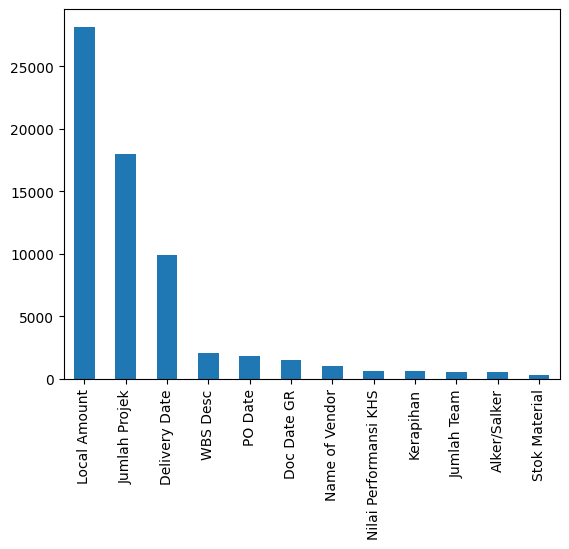

In [ ]:
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<Axes: >

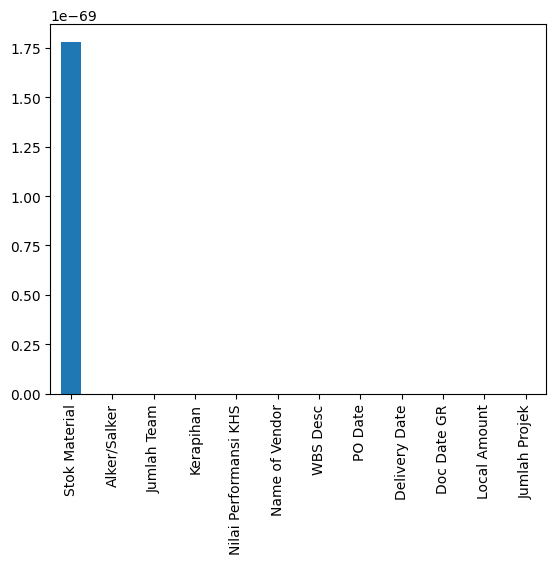

In [ ]:
# if p-value > 0.5, lower the importance
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

In [ ]:
# Menyimpan DataFrame ke file CSV
kumpulan_data_csv = "feature selection.csv"  # Nama file CSV yang ingin disimpan
path_direktori = "/content/drive/My Drive/Colab Notebooks"  # Path lengkap ke direktori penyimpanan (ubah sesuai dengan direktori Anda)
kumpulan_data.to_csv(path_direktori + "/" + kumpulan_data_csv, index=False)  # Menyimpan DataFrame ke file CSV

# DATA TRANSFORMATION

In [ ]:
import warnings
import pandas as pd

# Menyembunyikan semua peringatan
warnings.simplefilter(action="ignore", category=Warning)

In [ ]:
import pandas as pd
from datetime import datetime

# Mengubah kolom tanggal awal dan tanggal akhir menjadi tipe data datetime
kumpulan_data['PO Date'] = pd.to_datetime(kumpulan_data['PO Date'])
kumpulan_data['Delivery Date'] = pd.to_datetime(kumpulan_data['Delivery Date'])

# Menghitung durasi hari antara tanggal awal dan tanggal akhir
kumpulan_data['Durasi Kontrak'] = (kumpulan_data['Delivery Date'] - kumpulan_data['PO Date']).dt.days

# Menghapus baris terakhir pada DataFrame
kumpulan_data = kumpulan_data.iloc[:-1]

kumpulan_data['Durasi Kontrak']


0       59
1       59
2       59
3       59
4       59
        ..
7321    29
7322    29
7323    29
7324    29
7325    29
Name: Durasi Kontrak, Length: 6923, dtype: int64

In [ ]:
import pandas as pd
from datetime import datetime

# Mengubah kolom tanggal awal dan tanggal akhir menjadi tipe data datetime
kumpulan_data['PO Date'] = pd.to_datetime(kumpulan_data['PO Date'])
kumpulan_data['Doc Date GR'] = pd.to_datetime(kumpulan_data['Doc Date GR'])

# Menghitung durasi hari antara tanggal awal dan tanggal akhir
kumpulan_data['Durasi Penyelesaian'] = (kumpulan_data['Doc Date GR'] - kumpulan_data['PO Date']).dt.days

# Menghapus baris terakhir pada DataFrame
kumpulan_data = kumpulan_data.iloc[:-1]

kumpulan_data['Durasi Penyelesaian']

0       74
1       74
2       74
3       74
4       74
        ..
7320     2
7321     2
7322     2
7323     2
7324     2
Name: Durasi Penyelesaian, Length: 6922, dtype: int64

In [ ]:
print(kumpulan_data.columns)

Index(['WBS Desc', 'Name of Vendor', 'PO Date', 'Delivery Date', 'Doc Date GR',
       'Local Amount', 'Jumlah Projek', 'Nilai Performansi KHS',
       'Alker/Salker', 'Stok Material', 'Jumlah Team', 'Kerapihan',
       'Durasi Kontrak', 'Durasi Penyelesaian'],
      dtype='object')


In [ ]:
# Mengonversi kolom 'Local_Amount' ke tipe data string
kumpulan_data['Local Amount'] = kumpulan_data['Local Amount'].astype(str)

# Menghilangkan koma dari kolom 'Local_Amount'
kumpulan_data['Local Amount'] = kumpulan_data['Local Amount'].str.replace(',', '').astype(float)

# Menampilkan data hasil akhir yang sudah diubah menjadi float
kumpulan_data['Local Amount']

0        3582546.0
1       16057014.0
2        1955579.0
3       24203409.0
4        7735037.0
           ...    
7320     2165478.0
7321     2165478.0
7322     2165478.0
7323     2103255.0
7324     2165478.0
Name: Local Amount, Length: 6922, dtype: float64

In [ ]:
# Multiply 'jumlah_projek' with 'nilai_projek' and store the result in a new column 'total_nilai'
kumpulan_data['nilai projek per LoP'] = kumpulan_data['Jumlah Projek'] * kumpulan_data['Local Amount']

# Print the updated DataFrame
kumpulan_data['nilai projek per LoP']

0        28660368.0
1       128456112.0
2        15644632.0
3       193627272.0
4        61880296.0
           ...     
7320     34647648.0
7321     34647648.0
7322     34647648.0
7323     33652080.0
7324     34647648.0
Name: nilai projek per LoP, Length: 6922, dtype: float64

In [ ]:
# Calculate the average 'nilai projek per LoP' per banyaknya baris data
average_per_banyaknya_baris_data = kumpulan_data['nilai projek per LoP'].mean()

# Create a new column 'Sesuai' based on the condition
kumpulan_data['Kategori Anggaran Projek'] = kumpulan_data['nilai projek per LoP'].apply(lambda x: 'anggaran sesuai' if x <= average_per_banyaknya_baris_data else 'anggaran tidak sesuai')

# Print the updated DataFrame
kumpulan_data['Kategori Anggaran Projek']


0       anggaran sesuai
1       anggaran sesuai
2       anggaran sesuai
3       anggaran sesuai
4       anggaran sesuai
             ...       
7320    anggaran sesuai
7321    anggaran sesuai
7322    anggaran sesuai
7323    anggaran sesuai
7324    anggaran sesuai
Name: Kategori Anggaran Projek, Length: 6922, dtype: object

In [ ]:
# Create a new column 'Kecepatan' based on the condition
kumpulan_data['Kategori Durasi Projek'] = ''
for index, row in kumpulan_data.iterrows():
    if row['Durasi Penyelesaian'] <= row['Durasi Kontrak']:
        kumpulan_data.loc[index, 'Kategori Durasi Projek'] = 'pengerjaan cepat'
    else:
        kumpulan_data.loc[index, 'Kategori Durasi Projek'] = 'pengerjaan lambat'

# Print the updated DataFrame
kumpulan_data['Kategori Durasi Projek']

0       pengerjaan lambat
1       pengerjaan lambat
2       pengerjaan lambat
3       pengerjaan lambat
4       pengerjaan lambat
              ...        
7320     pengerjaan cepat
7321     pengerjaan cepat
7322     pengerjaan cepat
7323     pengerjaan cepat
7324     pengerjaan cepat
Name: Kategori Durasi Projek, Length: 6922, dtype: object

In [ ]:
kumpulan_data['Nilai Performansi KHS'] = kumpulan_data['Nilai Performansi KHS'].str.lower()


kumpulan_data['Nilai Performansi KHS']

0       kontrak harga satuan kurang memenuhi
1       kontrak harga satuan kurang memenuhi
2       kontrak harga satuan kurang memenuhi
3       kontrak harga satuan kurang memenuhi
4       kontrak harga satuan kurang memenuhi
                        ...                 
7320           kontrak harga satuan memenuhi
7321           kontrak harga satuan memenuhi
7322           kontrak harga satuan memenuhi
7323           kontrak harga satuan memenuhi
7324           kontrak harga satuan memenuhi
Name: Nilai Performansi KHS, Length: 6922, dtype: object

In [ ]:
# Menyimpan DataFrame ke file CSV
kumpulan_data_csv = "kumpulan_data.csv"  # Nama file CSV yang ingin disimpan
path_direktori = "/content/drive/My Drive/Colab Notebooks"  # Path lengkap ke direktori penyimpanan (ubah sesuai dengan direktori Anda)
kumpulan_data.to_csv(path_direktori + "/" + kumpulan_data_csv, index=False)  # Menyimpan DataFrame ke file CSV

In [ ]:
print(kumpulan_data[:6922])

                       WBS Desc                    Name of Vendor    PO Date  \
0                  PT2 TREG VII                  PT. TELKOM AKSES 2021-12-27   
1                  PT2 TREG VII                  PT. TELKOM AKSES 2021-12-27   
2                  PT2 TREG VII                  PT. TELKOM AKSES 2021-12-27   
3                  PT2 TREG VII                  PT. TELKOM AKSES 2021-12-27   
4                  PT2 TREG VII                  PT. TELKOM AKSES 2021-12-27   
...                         ...                               ...        ...   
7320  LME & INST AP CONS TREG-7  PT. MAPPADECENG JAYA LESTARI (I) 2022-12-28   
7321  LME & INST AP CONS TREG-7  PT. MAPPADECENG JAYA LESTARI (I) 2022-12-28   
7322  LME & INST AP CONS TREG-7  PT. MAPPADECENG JAYA LESTARI (I) 2022-12-28   
7323  LME & INST AP CONS TREG-7  PT. MAPPADECENG JAYA LESTARI (I) 2022-12-28   
7324  LME & INST AP CONS TREG-7  PT. MAPPADECENG JAYA LESTARI (I) 2022-12-28   

     Delivery Date Doc Date GR  Local A

In [ ]:
# Mengganti path dengan direktori yang sesuai
path = '/content/drive/My Drive/Colab Notebooks/'

data_preprocessing = pd.read_csv(path + 'kumpulan_data.csv', encoding="ISO-8859-1")

In [ ]:
data_preprocessing

,WBS Desc,Name of Vendor,PO Date,Delivery Date,Doc Date GR,Local Amount,Jumlah Projek,Nilai Performansi KHS,Alker/Salker,Stok Material,Jumlah Team,Kerapihan,Durasi Kontrak,Durasi Penyelesaian,nilai projek per LoP,Kategori Anggaran Projek,Kategori Durasi Projek
0,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,3582546.0,8.0,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,59,74,28660368.0,anggaran sesuai,pengerjaan lambat
1,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,16057014.0,8.0,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,59,74,128456112.0,anggaran sesuai,pengerjaan lambat
2,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,1955579.0,8.0,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,59,74,15644632.0,anggaran sesuai,pengerjaan lambat
3,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,24203409.0,8.0,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,59,74,193627272.0,anggaran sesuai,pengerjaan lambat
4,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,7735037.0,8.0,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,59,74,61880296.0,anggaran sesuai,pengerjaan lambat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6917,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),2022-12-28,2023-01-26,2022-12-30,2165478.0,16.0,kontrak harga satuan memenuhi,alker lengkap,stok material tersedia,team lengkap,tidak rapih,29,2,34647648.0,anggaran sesuai,pengerjaan cepat
6918,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),2022-12-28,2023-01-26,2022-12-30,2165478.0,16.0,kontrak harga satuan memenuhi,alker lengkap,stok material tersedia,team lengkap,tidak rapih,29,2,34647648.0,anggaran sesuai,pengerjaan cepat
6919,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),2022-12-28,2023-01-26,2022-12-30,2165478.0,16.0,kontrak harga satuan memenuhi,alker lengkap,stok material tersedia,team lengkap,tidak rapih,29,2,34647648.0,anggaran sesuai,pengerjaan cepat
6920,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),2022-12-28,2023-01-26,2022-12-30,2103255.0,16.0,kontrak harga satuan memenuhi,alker lengkap,stok material tersedia,team lengkap,tidak rapih,29,2,33652080.0,anggaran sesuai,pengerjaan cepat


In [ ]:
#check missing value
data_preprocessing.isnull().sum()

WBS Desc                    0
Name of Vendor              0
PO Date                     0
Delivery Date               0
Doc Date GR                 0
Local Amount                0
Jumlah Projek               0
Nilai Performansi KHS       0
Alker/Salker                0
Stok Material               0
Jumlah Team                 0
Kerapihan                   0
Durasi Kontrak              0
Durasi Penyelesaian         0
nilai projek per LoP        0
Kategori Anggaran Projek    0
Kategori Durasi Projek      0
dtype: int64

# **MULTILABLE BINARIZER**

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
# Mengganti nilai NaN dengan nilai default atau nilai yang sesuai dengan konteks data Anda
data_preprocessing['Nilai Performansi KHS'].fillna('default', inplace=True)
data_preprocessing['Alker/Salker'].fillna('default', inplace=True)
data_preprocessing['Stok Material'].fillna('default', inplace=True)
data_preprocessing['Jumlah Team'].fillna('default', inplace=True)
data_preprocessing['Kerapihan'].fillna('default', inplace=True)
data_preprocessing['Kategori Durasi Projek'].fillna('default', inplace=True)
data_preprocessing['Kategori Anggaran Projek'].fillna('default', inplace=True)

# Melakukan fit_transform menggunakan LabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform(data_preprocessing['Nilai Performansi KHS'])
mlb.fit_transform(data_preprocessing['Alker/Salker'])
mlb.fit_transform(data_preprocessing['Stok Material'])
mlb.fit_transform(data_preprocessing['Jumlah Team'])
mlb.fit_transform(data_preprocessing['Kerapihan'])
mlb.fit_transform(data_preprocessing['Kategori Durasi Projek'])
mlb.fit_transform(data_preprocessing['Kategori Anggaran Projek'])


array([[1, 1, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 0, 1],
       ...,
       [1, 1, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 0, 1]])

In [ ]:
data_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6922 entries, 0 to 6921
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WBS Desc                  6922 non-null   object 
 1   Name of Vendor            6922 non-null   object 
 2   PO Date                   6922 non-null   object 
 3   Delivery Date             6922 non-null   object 
 4   Doc Date GR               6922 non-null   object 
 5   Local Amount              6922 non-null   float64
 6   Jumlah Projek             6922 non-null   float64
 7   Nilai Performansi KHS     6922 non-null   object 
 8   Alker/Salker              6922 non-null   object 
 9   Stok Material             6922 non-null   object 
 10  Jumlah Team               6922 non-null   object 
 11  Kerapihan                 6922 non-null   object 
 12  Durasi Kontrak            6922 non-null   int64  
 13  Durasi Penyelesaian       6922 non-null   int64  
 14  nilai pr

In [ ]:
data_preprocessing['Nilai Performansi KHS']=data_preprocessing['Nilai Performansi KHS'].str.split(',\s*')
data_preprocessing['Alker/Salker']=data_preprocessing['Alker/Salker'].str.split(',\s*')
data_preprocessing['Stok Material']=data_preprocessing['Stok Material'].str.split(',\s*')
data_preprocessing['Jumlah Team']=data_preprocessing['Jumlah Team'].str.split(',\s*')
data_preprocessing['Kerapihan']=data_preprocessing['Kerapihan'].str.split(',\s*')
data_preprocessing['Kategori Durasi Projek']=data_preprocessing['Kategori Durasi Projek'].str.split(',\s*')
data_preprocessing['Kategori Anggaran Projek']=data_preprocessing['Kategori Anggaran Projek'].str.split(',\s*')

In [ ]:
mlb = MultiLabelBinarizer()

In [ ]:
mlb.fit(data_preprocessing['Nilai Performansi KHS'])
mlb.fit(data_preprocessing['Alker/Salker'])
mlb.fit(data_preprocessing['Stok Material'])
mlb.fit(data_preprocessing['Jumlah Team'])
mlb.fit(data_preprocessing['Kerapihan'])
mlb.fit(data_preprocessing['Kategori Durasi Projek'])
mlb.fit(data_preprocessing['Kategori Anggaran Projek'])

MultiLabelBinarizer()

In [ ]:
from sklearn.preprocessing import LabelEncoder

mlb.classes_

data_preprocessing['Nilai Performansi KHS'].explode().unique()
data_preprocessing['Alker/Salker'].explode().unique()
data_preprocessing['Stok Material'].explode().unique()
data_preprocessing['Jumlah Team'].explode().unique()
data_preprocessing['Kerapihan'].explode().unique()
data_preprocessing['Kategori Durasi Projek'].explode().unique()
data_preprocessing['Kategori Anggaran Projek'].explode().unique()

mlb.transform(data_preprocessing['Nilai Performansi KHS'])
mlb.transform(data_preprocessing['Alker/Salker'])
mlb.transform(data_preprocessing['Stok Material'])
mlb.transform(data_preprocessing['Jumlah Team'])
mlb.transform(data_preprocessing['Kerapihan'])
mlb.transform(data_preprocessing['Kategori Durasi Projek'])
mlb.transform(data_preprocessing['Kategori Anggaran Projek'])

a1 = pd.DataFrame(mlb.fit_transform(data_preprocessing['Nilai Performansi KHS']), columns=mlb.classes_)
a2 = pd.DataFrame(mlb.fit_transform(data_preprocessing['Alker/Salker']), columns=mlb.classes_)
a3 = pd.DataFrame(mlb.fit_transform(data_preprocessing['Stok Material']), columns=mlb.classes_)
a4 = pd.DataFrame(mlb.fit_transform(data_preprocessing['Jumlah Team']), columns=mlb.classes_)
a5 = pd.DataFrame(mlb.fit_transform(data_preprocessing['Kerapihan']), columns=mlb.classes_)
a6 = pd.DataFrame(mlb.fit_transform(data_preprocessing['Kategori Durasi Projek']), columns=mlb.classes_)
a7 = pd.DataFrame(mlb.fit_transform(data_preprocessing['Kategori Anggaran Projek']), columns=mlb.classes_)

In [ ]:
data_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6922 entries, 0 to 6921
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WBS Desc                  6922 non-null   object 
 1   Name of Vendor            6922 non-null   object 
 2   PO Date                   6922 non-null   object 
 3   Delivery Date             6922 non-null   object 
 4   Doc Date GR               6922 non-null   object 
 5   Local Amount              6922 non-null   float64
 6   Jumlah Projek             6922 non-null   float64
 7   Nilai Performansi KHS     6922 non-null   object 
 8   Alker/Salker              6922 non-null   object 
 9   Stok Material             6922 non-null   object 
 10  Jumlah Team               6922 non-null   object 
 11  Kerapihan                 6922 non-null   object 
 12  Durasi Kontrak            6922 non-null   int64  
 13  Durasi Penyelesaian       6922 non-null   int64  
 14  nilai pr

In [ ]:
binarizer=pd.concat([data_preprocessing, a1, a2, a3, a4, a5, a6, a7], axis=1)

In [ ]:
binarizer

,WBS Desc,Name of Vendor,PO Date,Delivery Date,Doc Date GR,Local Amount,Jumlah Projek,Nilai Performansi KHS,Alker/Salker,Stok Material,Jumlah Team,Kerapihan,Durasi Kontrak,Durasi Penyelesaian,nilai projek per LoP,Kategori Anggaran Projek,Kategori Durasi Projek,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team lengkap,team tidak lengkap,rapih,tidak rapih,pengerjaan cepat,pengerjaan lambat,anggaran sesuai,anggaran tidak sesuai
0,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,3582546.0,8.0,[kontrak harga satuan kurang memenuhi],[alker lengkap],[stok material tersedia],[team lengkap],[rapih],59,74,28660368.0,[anggaran sesuai],[pengerjaan lambat],1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
1,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,16057014.0,8.0,[kontrak harga satuan kurang memenuhi],[alker lengkap],[stok material tersedia],[team lengkap],[rapih],59,74,128456112.0,[anggaran sesuai],[pengerjaan lambat],1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
2,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,1955579.0,8.0,[kontrak harga satuan kurang memenuhi],[alker lengkap],[stok material tersedia],[team lengkap],[rapih],59,74,15644632.0,[anggaran sesuai],[pengerjaan lambat],1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
3,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,24203409.0,8.0,[kontrak harga satuan kurang memenuhi],[alker lengkap],[stok material tersedia],[team lengkap],[rapih],59,74,193627272.0,[anggaran sesuai],[pengerjaan lambat],1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
4,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,7735037.0,8.0,[kontrak harga satuan kurang memenuhi],[alker lengkap],[stok material tersedia],[team lengkap],[rapih],59,74,61880296.0,[anggaran sesuai],[pengerjaan lambat],1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6917,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),2022-12-28,2023-01-26,2022-12-30,2165478.0,16.0,[kontrak harga satuan memenuhi],[alker lengkap],[stok material tersedia],[team lengkap],[tidak rapih],29,2,34647648.0,[anggaran sesuai],[pengerjaan cepat],0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
6918,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),2022-12-28,2023-01-26,2022-12-30,2165478.0,16.0,[kontrak harga satuan memenuhi],[alker lengkap],[stok material tersedia],[team lengkap],[tidak rapih],29,2,34647648.0,[anggaran sesuai],[pengerjaan cepat],0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
6919,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),2022-12-28,2023-01-26,2022-12-30,2165478.0,16.0,[kontrak harga satuan memenuhi],[alker lengkap],[stok material tersedia],[team lengkap],[tidak rapih],29,2,34647648.0,[anggaran sesuai],[pengerjaan cepat],0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
6920,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),2022-12-28,2023-01-26,2022-12-30,2103255.0,16.0,[kontrak harga satuan memenuhi],[alker lengkap],[stok material tersedia],[team lengkap],[tidak rapih],29,2,33652080.0,[anggaran sesuai],[pengerjaan cepat],0,1,0,1,0,1,0,1,0,0,1,1,0,1,0


In [ ]:
multilabel_binarizer = binarizer.drop(['Nilai Performansi KHS','Alker/Salker','Stok Material','Jumlah Team','Kerapihan','Kategori Durasi Projek','Kategori Anggaran Projek'], axis=1)

In [ ]:
multilabel_binarizer

,WBS Desc,Name of Vendor,PO Date,Delivery Date,Doc Date GR,Local Amount,Jumlah Projek,Durasi Kontrak,Durasi Penyelesaian,nilai projek per LoP,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team lengkap,team tidak lengkap,rapih,tidak rapih,pengerjaan cepat,pengerjaan lambat,anggaran sesuai,anggaran tidak sesuai
0,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,3582546.0,8.0,59,74,28660368.0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
1,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,16057014.0,8.0,59,74,128456112.0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
2,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,1955579.0,8.0,59,74,15644632.0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
3,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,24203409.0,8.0,59,74,193627272.0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
4,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,7735037.0,8.0,59,74,61880296.0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6917,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),2022-12-28,2023-01-26,2022-12-30,2165478.0,16.0,29,2,34647648.0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
6918,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),2022-12-28,2023-01-26,2022-12-30,2165478.0,16.0,29,2,34647648.0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
6919,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),2022-12-28,2023-01-26,2022-12-30,2165478.0,16.0,29,2,34647648.0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
6920,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),2022-12-28,2023-01-26,2022-12-30,2103255.0,16.0,29,2,33652080.0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0


In [ ]:
# Menyimpan DataFrame ke file CSV
multilabel_binarizer_csv = "binarizer_data.csv"  # Nama file CSV yang ingin disimpan
path_direktori = "/content/drive/My Drive/Colab Notebooks"  # Path lengkap ke direktori penyimpanan (ubah sesuai dengan direktori Anda)
multilabel_binarizer.to_csv(path_direktori + "/" + multilabel_binarizer_csv, index=False)  # Menyimpan DataFrame ke file CSV

In [ ]:
# Menghapus baris yang kosong dari dataset
multilabel_binarizer_csv = kumpulan_data.dropna()

In [ ]:
#check missing value
multilabel_binarizer_csv.isnull().sum()

WBS Desc                    0
Name of Vendor              0
PO Date                     0
Delivery Date               0
Doc Date GR                 0
Local Amount                0
Jumlah Projek               0
Nilai Performansi KHS       0
Alker/Salker                0
Stok Material               0
Jumlah Team                 0
Kerapihan                   0
Durasi Kontrak              0
Durasi Penyelesaian         0
nilai projek per LoP        0
Kategori Anggaran Projek    0
Kategori Durasi Projek      0
dtype: int64

In [ ]:
print("Jumlah baris:", multilabel_binarizer_csv.shape[0])
print("Jumlah kolom:", multilabel_binarizer_csv.shape[1])

Jumlah baris: 6922
Jumlah kolom: 17


In [ ]:
# Baca file GAPED.csv dari Google Drive
path = '/content/drive/My Drive/Colab Notebooks/kumpulan_data.csv'
df_data = pd.read_csv(path)

# Menampilkan isi dataframe
df_data[:10]

,WBS Desc,Name of Vendor,PO Date,Delivery Date,Doc Date GR,Local Amount,Jumlah Projek,Nilai Performansi KHS,Alker/Salker,Stok Material,Jumlah Team,Kerapihan,Durasi Kontrak,Durasi Penyelesaian,nilai projek per LoP,Kategori Anggaran Projek,Kategori Durasi Projek
0,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,3582546.0,8.0,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,59,74,28660368.0,anggaran sesuai,pengerjaan lambat
1,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,16057014.0,8.0,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,59,74,128456112.0,anggaran sesuai,pengerjaan lambat
2,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,1955579.0,8.0,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,59,74,15644632.0,anggaran sesuai,pengerjaan lambat
3,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,24203409.0,8.0,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,59,74,193627272.0,anggaran sesuai,pengerjaan lambat
4,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,7735037.0,8.0,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,59,74,61880296.0,anggaran sesuai,pengerjaan lambat
5,PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,5571596.0,8.0,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,59,74,44572768.0,anggaran sesuai,pengerjaan lambat
6,PT2 TREG VII,PT. TELKOM AKSES,2021-12-25,2022-01-23,2022-02-17,4564635.0,7.0,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,29,54,31952445.0,anggaran sesuai,pengerjaan lambat
7,PT2 TREG VII,PT. TELKOM AKSES,2021-12-25,2022-01-23,2022-02-17,8884625.0,7.0,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,29,54,62192375.0,anggaran sesuai,pengerjaan lambat
8,PT2 TREG VII,PT. TELKOM AKSES,2021-12-25,2022-01-23,2022-02-17,13414733.0,7.0,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,29,54,93903131.0,anggaran sesuai,pengerjaan lambat
9,PT2 TREG VII,PT. TELKOM AKSES,2021-12-25,2022-01-23,2022-02-17,33880541.0,7.0,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,29,54,237163787.0,anggaran sesuai,pengerjaan lambat


In [ ]:
df_data[['Nilai Performansi KHS','Durasi Penyelesaian']].head(10)

,Nilai Performansi KHS,Durasi Penyelesaian
0,kontrak harga satuan kurang memenuhi,74
1,kontrak harga satuan kurang memenuhi,74
2,kontrak harga satuan kurang memenuhi,74
3,kontrak harga satuan kurang memenuhi,74
4,kontrak harga satuan kurang memenuhi,74
5,kontrak harga satuan kurang memenuhi,74
6,kontrak harga satuan kurang memenuhi,54
7,kontrak harga satuan kurang memenuhi,54
8,kontrak harga satuan kurang memenuhi,54
9,kontrak harga satuan kurang memenuhi,54


In [ ]:
df_data[['Kategori Durasi Projek', 'Durasi Penyelesaian']]

,Kategori Durasi Projek,Durasi Penyelesaian
0,pengerjaan lambat,74
1,pengerjaan lambat,74
2,pengerjaan lambat,74
3,pengerjaan lambat,74
4,pengerjaan lambat,74
...,...,...
6917,pengerjaan cepat,2
6918,pengerjaan cepat,2
6919,pengerjaan cepat,2
6920,pengerjaan cepat,2
